In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_csv(r"C:\Users\choud\Downloads\education_career_success.csv")


In [13]:
df.head()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No


In [14]:
df.shape

(5000, 20)

In [15]:
print("Number of rows", df.shape[0])
print("Number of columns", df.shape[1])

Number of rows 5000
Number of columns 20


In [16]:
df.isna().sum()

Student_ID               0
Age                      0
Gender                   0
High_School_GPA          0
SAT_Score                0
University_Ranking       0
University_GPA           0
Field_of_Study           0
Internships_Completed    0
Projects_Completed       0
Certifications           0
Soft_Skills_Score        0
Networking_Score         0
Job_Offers               0
Starting_Salary          0
Career_Satisfaction      0
Years_to_Promotion       0
Current_Job_Level        0
Work_Life_Balance        0
Entrepreneurship         0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             5000 non-null   object 
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   High_School_GPA        5000 non-null   float64
 4   SAT_Score              5000 non-null   int64  
 5   University_Ranking     5000 non-null   int64  
 6   University_GPA         5000 non-null   float64
 7   Field_of_Study         5000 non-null   object 
 8   Internships_Completed  5000 non-null   int64  
 9   Projects_Completed     5000 non-null   int64  
 10  Certifications         5000 non-null   int64  
 11  Soft_Skills_Score      5000 non-null   int64  
 12  Networking_Score       5000 non-null   int64  
 13  Job_Offers             5000 non-null   int64  
 14  Starting_Salary        5000 non-null   float64
 15  Care

In [18]:
df.describe()

,Age,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,23.442200,2.996978,1253.832000,504.335600,3.020028,1.982200,4.562800,2.512200,5.546000,5.538000,2.488800,50563.540000,5.578000,3.015800,5.482400
std,3.473712,0.575673,203.228954,291.060011,0.576047,1.408219,2.872927,1.703183,2.851159,2.850084,1.711859,14494.958207,2.871997,1.417446,2.883427
min,18.000000,2.000000,900.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25000.000000,1.000000,1.000000,1.000000
25%,20.000000,2.500000,1076.000000,256.000000,2.520000,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,40200.000000,3.000000,2.000000,3.000000
50%,23.000000,2.990000,1257.000000,501.500000,3.030000,2.000000,5.000000,3.000000,6.000000,6.000000,2.000000,50300.000000,6.000000,3.000000,6.000000
75%,26.000000,3.500000,1432.000000,759.000000,3.510000,3.000000,7.000000,4.000000,8.000000,8.000000,4.000000,60500.000000,8.000000,4.000000,8.000000
max,29.000000,4.000000,1600.000000,1000.000000,4.000000,4.000000,9.000000,5.000000,10.000000,10.000000,5.000000,101000.000000,10.000000,5.000000,10.000000


In [17]:
cat=[]
num=[]
for column in df.columns:
    if df[column].nunique()>10:
        num.append(column)
    else:
        cat.append(column)

UNIVARIATE ANALYSIS


In [23]:
age = df['Age']

print("Mean:", age.mean())
print("Median:", age.median())
print("Mode:", age.mode()[0])
print("Variance:", age.var())
print("Standard Deviation:", age.std())
print("Range:", age.max() - age.min())

Mean: 23.4422
Median: 23.0
Mode: 18
Variance: 12.066672494499006
Standard Deviation: 3.473711630878275
Range: 11


In [25]:



def compute_statistics(column_name):
    data = df[column_name].dropna()  
    print(f"Statistics for {column_name}:")
    print("Mean:", data.mean())
    print("Median:", data.median())
    print("Mode:", data.mode().iloc[0] if not data.mode().empty else "No mode")
    print("Variance:", data.var())
    print("Standard Deviation:", data.std())
    print("Range:", data.max() - data.min())
    print()


compute_statistics('High_School_GPA')
compute_statistics('SAT_Score')
compute_statistics('University_Ranking')
compute_statistics('University_GPA')


Statistics for High_School_GPA:
Mean: 2.9969780000000004
Median: 2.99
Mode: 3.72
Variance: 0.3313997674694939
Standard Deviation: 0.5756733166210624
Range: 2.0

Statistics for SAT_Score:
Mean: 1253.832
Median: 1257.0
Mode: 1319
Variance: 41302.007777555504
Standard Deviation: 203.22895408271802
Range: 700

Statistics for University_Ranking:
Mean: 504.3356
Median: 501.5
Mode: 816
Variance: 84715.92975859156
Standard Deviation: 291.0600105795909
Range: 999

Statistics for University_GPA:
Mean: 3.0200280000000004
Median: 3.03
Mode: 3.22
Variance: 0.33183048531306564
Standard Deviation: 0.5760472943370758
Range: 2.0



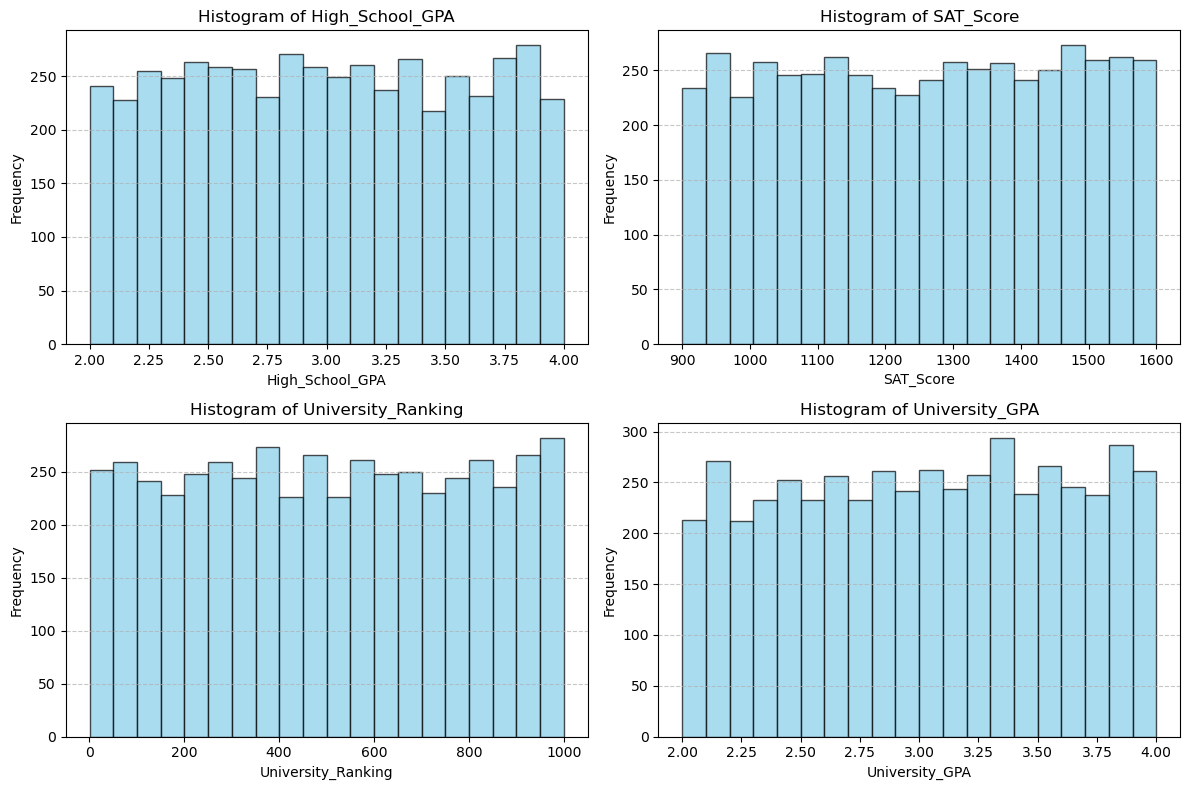

In [27]:
df.columns = df.columns.str.strip()


continuous_columns = ['High_School_GPA', 'SAT_Score', 'University_Ranking', 'University_GPA']


plt.figure(figsize=(12, 8))


for i, column in enumerate(continuous_columns, 1):
    plt.subplot(2, 2, i)  
    plt.hist(df[column].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()


plt.show()

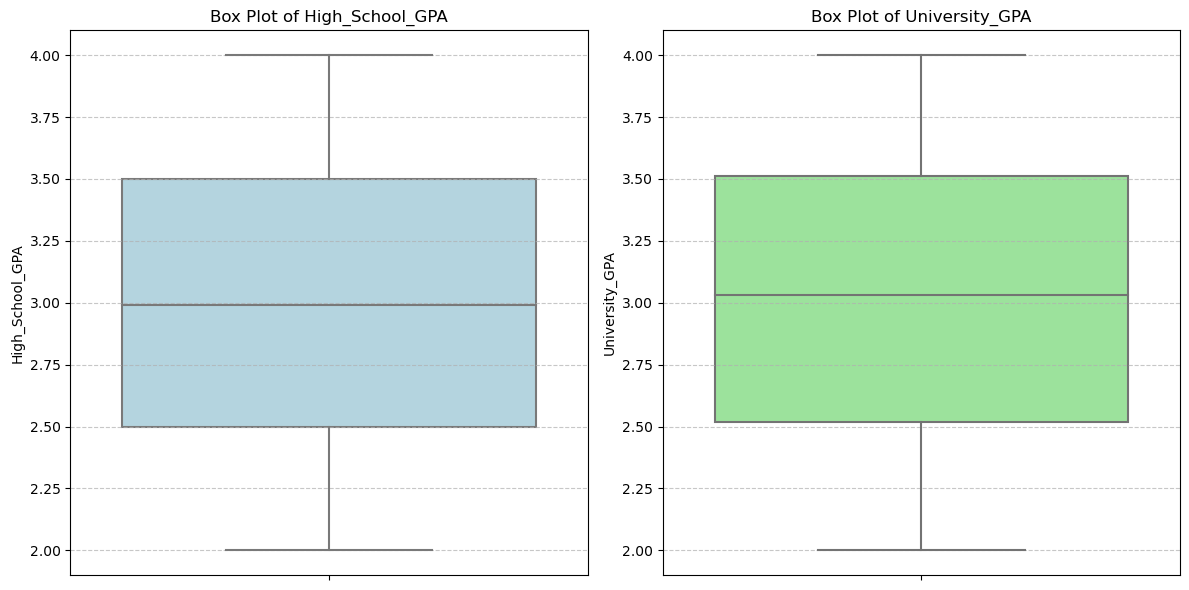

In [29]:
boxplot_columns = ['High_School_GPA', 'University_GPA']


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.boxplot(y=df[boxplot_columns[0]].dropna(), color='lightblue')
plt.title(f'Box Plot of {boxplot_columns[0]}')
plt.ylabel(boxplot_columns[0])
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.subplot(1, 2, 2)
sns.boxplot(y=df[boxplot_columns[1]].dropna(), color='lightgreen')
plt.title(f'Box Plot of {boxplot_columns[1]}')
plt.ylabel(boxplot_columns[1])
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()


plt.show()


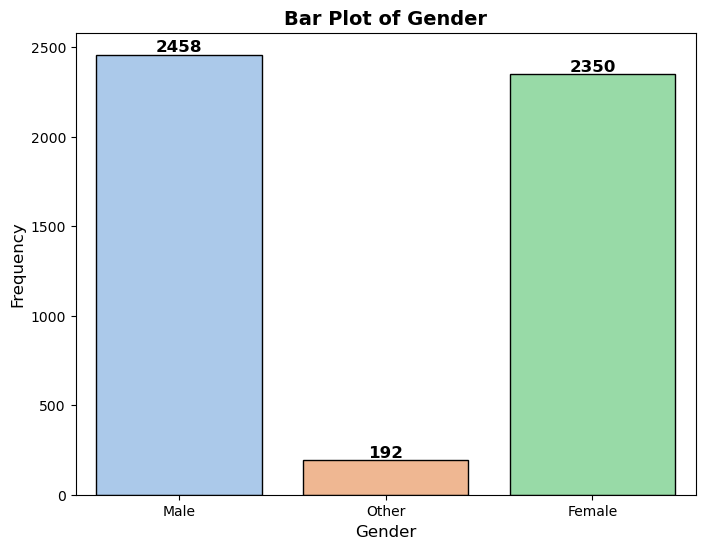

In [30]:
plt.figure(figsize=(8, 6))


ax = sns.countplot(x=df['Gender'].dropna(), palette='pastel', edgecolor='black')


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')


plt.title('Bar Plot of Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.show()


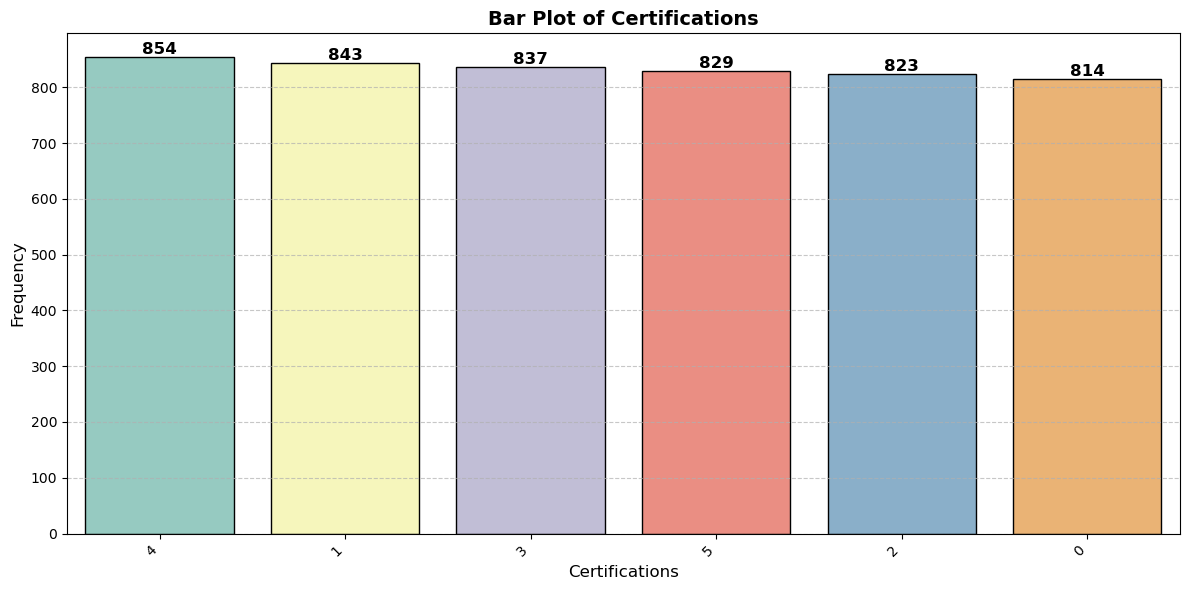

In [5]:



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"C:\Users\choud\Downloads\education_career_success.csv")  # Use raw string (r"") to avoid errors


df.columns = df.columns.str.strip()


df_Certifications = df['Certifications'].dropna()


plt.figure(figsize=(12, 6))


ax = sns.countplot(x=df_Certifications, palette='Set3', edgecolor='black', order=df_Certifications.value_counts().index)


plt.xticks(rotation=45, ha='right')


for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height): 
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')


plt.title('Bar Plot of Certifications', fontsize=14, fontweight='bold')
plt.xlabel('Certifications', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()


plt.show()






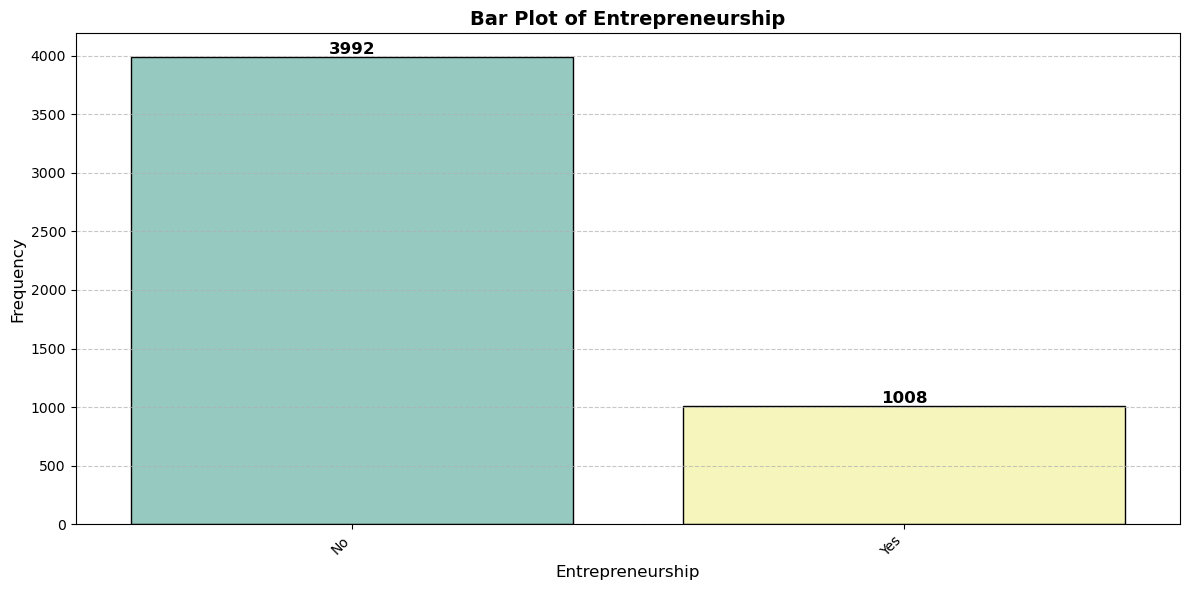

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"C:\Users\choud\Downloads\education_career_success.csv") 

df.columns = df.columns.str.strip()


df_Entrepreneurship = df['Entrepreneurship'].dropna()


plt.figure(figsize=(12, 6))


ax = sns.countplot(x=df_Entrepreneurship, palette='Set3', edgecolor='black', order=df_Entrepreneurship.value_counts().index)


plt.xticks(rotation=45, ha='right')


for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):  
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')


plt.title('Bar Plot of Entrepreneurship', fontsize=14, fontweight='bold')
plt.xlabel('Entrepreneurship', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()


plt.show()


MULTIVARIATE ANALYSIS 

Text(0, 0.5, 'SAT_Score')

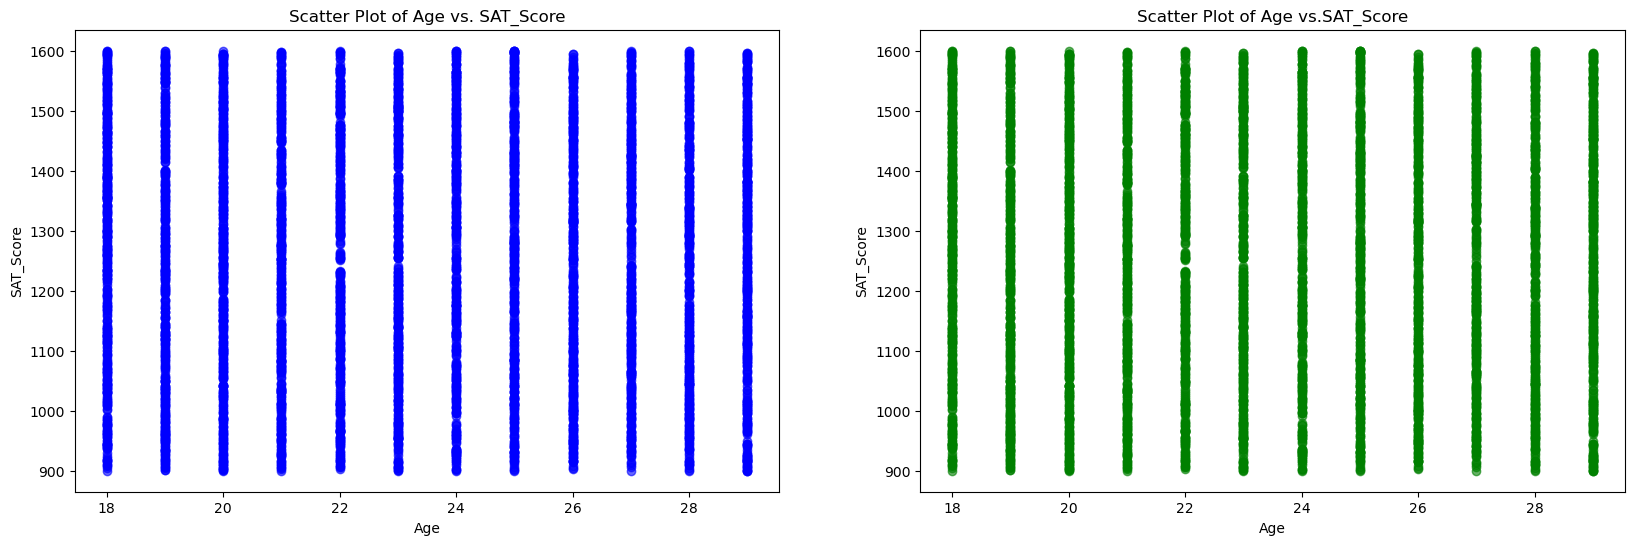

In [8]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Age'], df['SAT_Score'], alpha=0.6, color='blue')
plt.title('Scatter Plot of Age vs. SAT_Score')
plt.xlabel('Age')
plt.ylabel('SAT_Score')


plt.subplot(1, 2, 2)
plt.scatter(df['Age'], df['SAT_Score'], alpha=0.6, color='green')
plt.title('Scatter Plot of Age vs.SAT_Score')
plt.xlabel('Age')
plt.ylabel('SAT_Score')

Text(0, 0.5, 'SAT_Score')

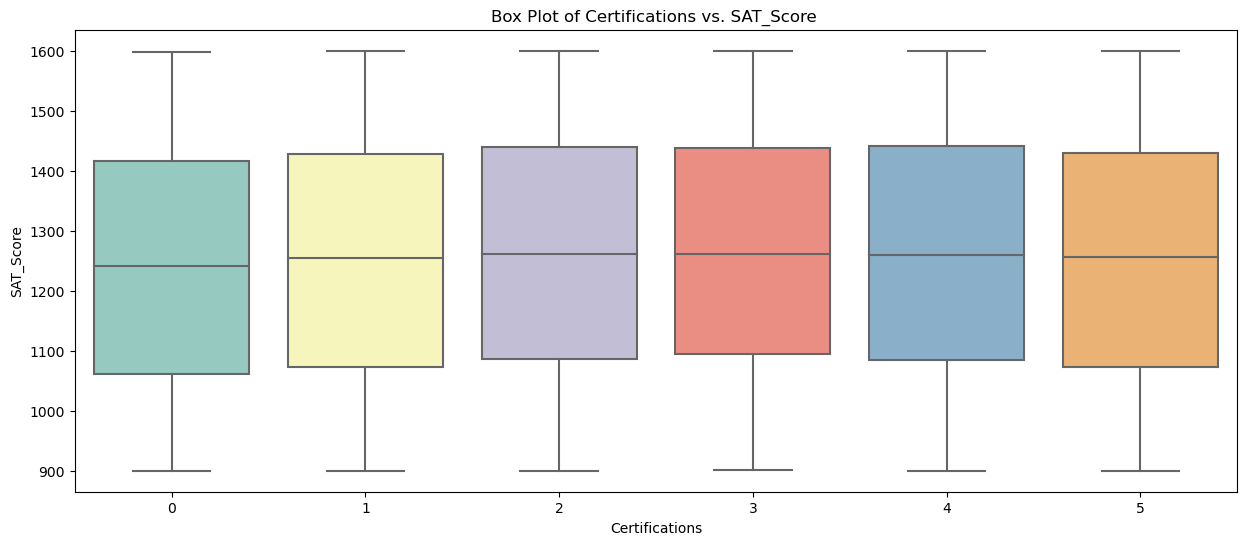

In [9]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Certifications', y='SAT_Score', data=df, palette='Set3')
plt.title('Box Plot of Certifications vs. SAT_Score ')
plt.xlabel('Certifications')
plt.ylabel('SAT_Score')

In [13]:
correlation_matrix = df[['Age', 'SAT_Score']].corr()
print(correlation_matrix)

                Age  SAT_Score
Age        1.000000  -0.002416
SAT_Score -0.002416   1.000000


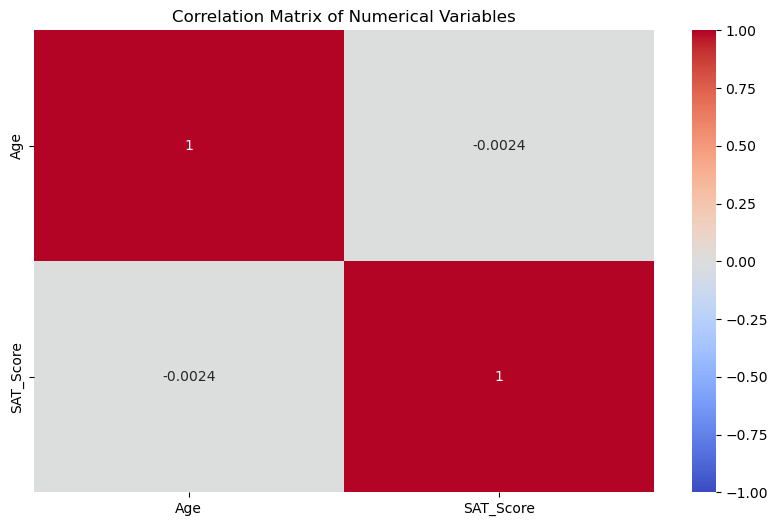

In [15]:
correlation_matrix = df[['Age', 'SAT_Score']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

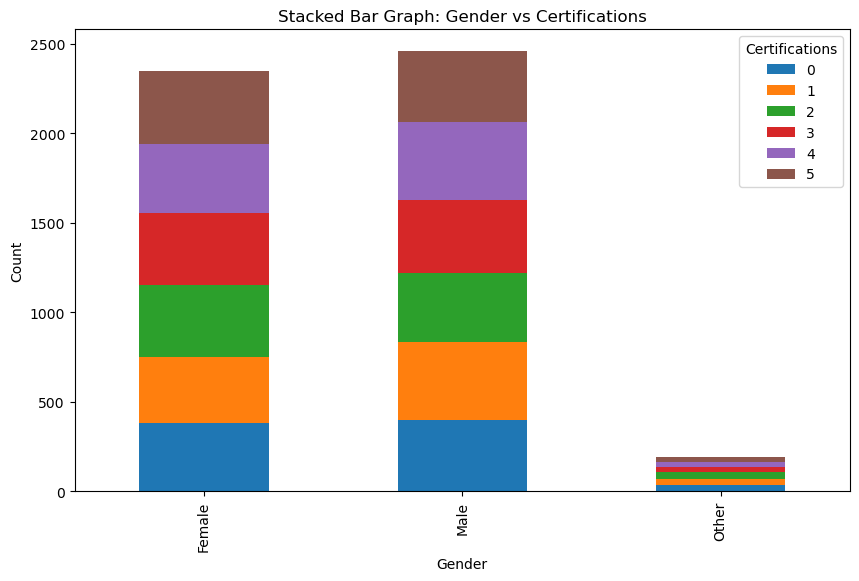

In [16]:
stacked_data = df.groupby(['Gender', 'Certifications']).size().unstack()
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Graph: Gender vs Certifications')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

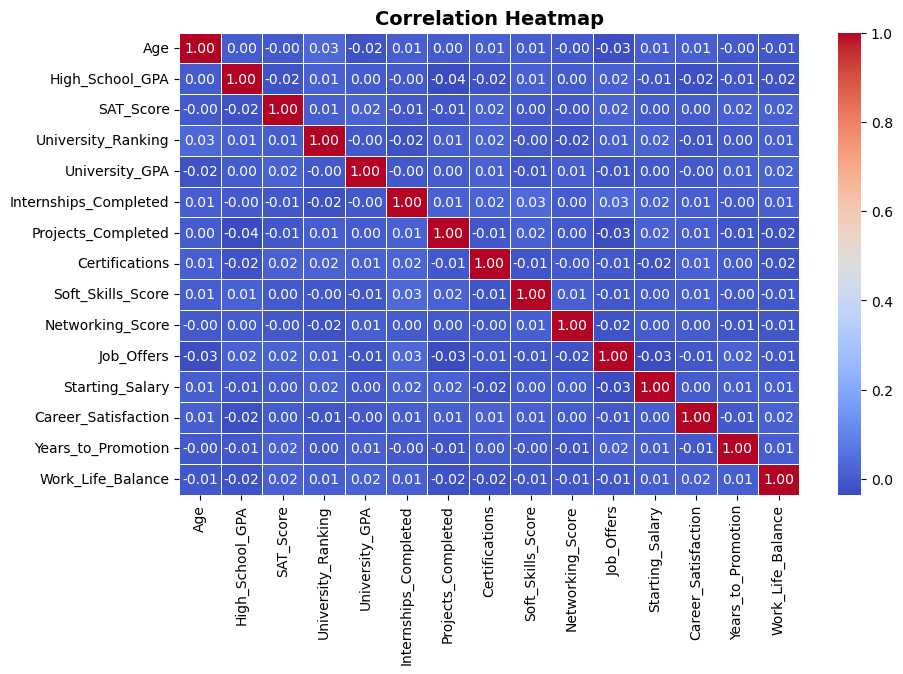

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"C:\Users\choud\Downloads\education_career_success.csv")  # Use raw string (r"") to avoid errors


df.columns = df.columns.str.strip()


numeric_df = df.select_dtypes(include=['number']).dropna()


plt.figure(figsize=(10, 6))


sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})


plt.title("Correlation Heatmap", fontsize=14, fontweight='bold')


plt.show()


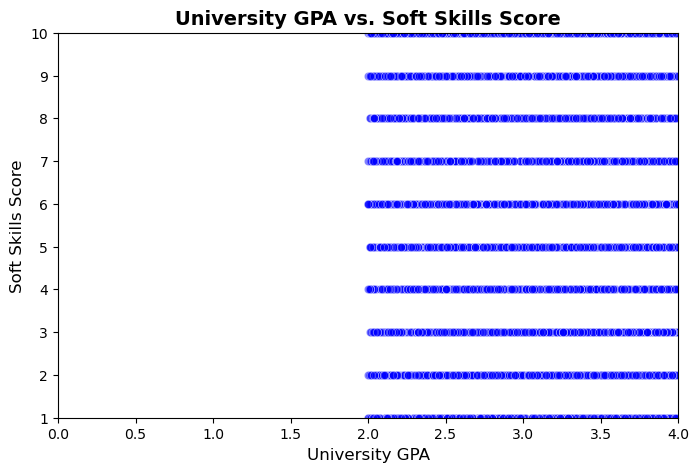

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"C:\Users\choud\Downloads\education_career_success.csv")  # Use raw string (r"") to avoid errors


df.columns = df.columns.str.strip()


plt.figure(figsize=(8, 5))


sns.scatterplot(data=df, x="University_GPA", y="Soft_Skills_Score", alpha=0.5, color='blue')


plt.xlim(0, 4.0)  
plt.ylim(df["Soft_Skills_Score"].min(), df["Soft_Skills_Score"].max())  # Auto adjust y-axis


plt.xlabel("University GPA", fontsize=12)
plt.ylabel("Soft Skills Score", fontsize=12)
plt.title("University GPA vs. Soft Skills Score", fontsize=14, fontweight='bold')


plt.show()
